## Efficient Data Stream Anomaly Detection 

### 1. Using Isolation Forest Algorithm

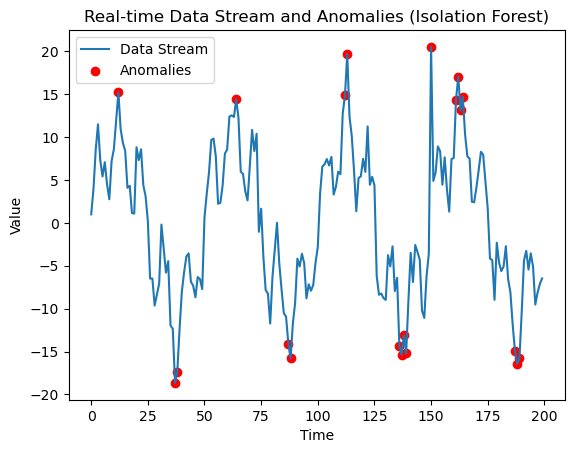

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#defining a function to simulate the data stream
def simulate_data_stream(stream_length, anomaly_index):
    np.random.seed(42)
    data_stream = []

    for i in range(stream_length):
        # Simulating regular pattern with sine wave
        regular_pattern = 10 * np.sin(2 * np.pi * i / 50)

        # Simulating seasonal variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 10)

        # Simulating random noise
        noise = np.random.normal(0, 2)

        data_point = regular_pattern + seasonal_variation + noise

        # Introducing anomaly at the specified index
        if i == anomaly_index:
            data_point += 20

        data_stream.append(data_point)

    return data_stream

#defining Isolation Forest Anomaly Detection function that will take the input as Real-time data stream
def isolation_forest_anomaly_detection(data_stream, contamination=0.1):
    X = np.array(data_stream).reshape(-1, 1)

    # Fitting the Isolation Forest model
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X)

    # Predicting the  anomalies
    anomalies = model.predict(X)

    # Converting the predictions to indices of anomalies
    anomaly_indices = np.where(anomalies == -1)[0]

    return anomaly_indices

#defining a function to Visualize the Anomalies
def visualize_data_stream(data_stream, anomalies):
    plt.plot(data_stream, label='Data Stream')
    plt.scatter(anomalies, [data_stream[i] for i in anomalies], c='red', label='Anomalies')
    plt.title('Real-time Data Stream and Anomalies (Isolation Forest)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

def main():
    stream_length = 200
    anomaly_index = 150

    data_stream = simulate_data_stream(stream_length, anomaly_index)

    anomaly_indices = isolation_forest_anomaly_detection(data_stream)

    visualize_data_stream(data_stream, anomaly_indices)

if __name__ == "__main__":
    main()


### 2. Seasonal Hybrid ESD Algorithm

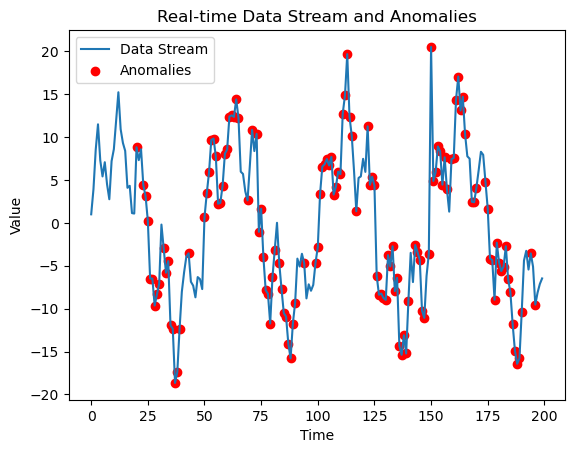

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

#defining a class for Anomaly Detection
class AnomalyDetector:
    def __init__(self, window_size, alpha=0.05):
        self.window_size = window_size
        self.alpha = alpha
        self.data = []
        self.test_statistic_threshold = None

    def update(self, value):
        self.data.append(value)
        if len(self.data) > self.window_size:
            self.data.pop(0)

    def detect_anomaly(self, new_value):
        if len(self.data) < self.window_size:
            self.update(new_value)
            return False

        mean = np.mean(self.data)
        std_dev = np.std(self.data, ddof=1)
        test_statistic = np.abs((new_value - mean) / (std_dev / np.sqrt(self.window_size)))

        if self.test_statistic_threshold is None:
            self.test_statistic_threshold = t.ppf(1 - self.alpha / 2, self.window_size - 1)

        if test_statistic > self.test_statistic_threshold:
            self.update(new_value)
            return True
        else:
            self.update(new_value)
            return False

#generating real-time data
def simulate_data_stream(stream_length, anomaly_index):
    np.random.seed(42)
    data_stream = []

    for i in range(stream_length):
        # Simulating regular pattern with sine wave
        regular_pattern = 10 * np.sin(2 * np.pi * i / 50)

        # Simulating seasonal variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 10)

        # Simulating random noise
        noise = np.random.normal(0, 2)

        data_point = regular_pattern + seasonal_variation + noise

        # Introduce anomaly at the specified index
        if i == anomaly_index:
            data_point += 20

        data_stream.append(data_point)

    return data_stream

#Visualizing the trend in data and anomalies
def visualize_data_stream(data_stream, anomalies):
    plt.plot(data_stream, label='Data Stream')
    plt.scatter(anomalies, [data_stream[i] for i in anomalies], c='red', label='Anomalies')
    plt.title('Real-time Data Stream and Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


def main():
    stream_length = 200
    anomaly_index = 150

    data_stream = simulate_data_stream(stream_length, anomaly_index)

    anomaly_detector = AnomalyDetector(window_size=20)

    detected_anomalies = []

    for i in range(len(data_stream)):
        value = data_stream[i]
        is_anomaly = anomaly_detector.detect_anomaly(value)

        if is_anomaly:
            detected_anomalies.append(i)

    visualize_data_stream(data_stream, detected_anomalies)


if __name__ == "__main__":
    main()


### 3. Using AutoEncoders Algorithm

2023-11-16 06:07:45.907767: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 06:07:45.972481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 06:07:45.972548: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 06:07:45.973989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 06:07:45.983137: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 06:07:45.983827: I tensorflow/core/platform/cpu_feature_guard.cc:1

7/7 [==============================] - 0s 2ms/step


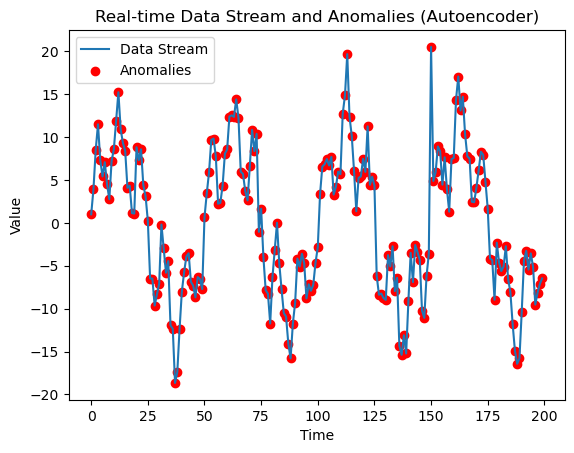

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#defining a function to generate real-time data
def simulate_data_stream(stream_length, anomaly_index):
    np.random.seed(42)
    data_stream = []

    for i in range(stream_length):
        # Simulating regular pattern with sine wave
        regular_pattern = 10 * np.sin(2 * np.pi * i / 50)

        # Simulating seasonal variations
        seasonal_variation = 5 * np.sin(2 * np.pi * i / 10)

        # Simulating random noise
        noise = np.random.normal(0, 2)

        data_point = regular_pattern + seasonal_variation + noise

        # Introduce anomaly at the specified index
        if i == anomaly_index:
            data_point += 20

        data_stream.append(data_point)

    return data_stream

# building the autoencoders
def build_autoencoder(input_dim):
    model = Sequential([
        Dense(16, activation='relu', input_dim=input_dim),
        Dense(8, activation='relu'),
        Dense(16, activation='relu'),
        Dense(input_dim, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_autoencoder(data, epochs=50):
    autoencoder = build_autoencoder(input_dim=len(data[0]))
    autoencoder.fit(data, data, epochs=epochs, batch_size=32, shuffle=True, verbose=0)
    return autoencoder

def detect_anomalies(data_stream, autoencoder, threshold=0.1):
    reconstructions = autoencoder.predict(np.array(data_stream))
    mse = np.mean(np.square(np.array(data_stream) - reconstructions), axis=1)
    anomalies = np.where(mse > threshold)[0]
    return anomalies

def visualize_data_stream(data_stream, anomalies):
    plt.plot(data_stream, label='Data Stream')
    plt.scatter(anomalies, [data_stream[i] for i in anomalies], c='red', label='Anomalies')
    plt.title('Real-time Data Stream and Anomalies (Autoencoder)')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

def main():
    stream_length = 200
    anomaly_index = 150

    data_stream = simulate_data_stream(stream_length, anomaly_index)

    # Use the first 150 data points for training
    training_data = np.array(data_stream[:150]).reshape(-1, 1)

    autoencoder = train_autoencoder(training_data)

    anomalies = detect_anomalies(data_stream, autoencoder)

    visualize_data_stream(data_stream, anomalies)

if __name__ == "__main__":
    main()


#### 4. Using LSTM-AutoEncoder

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

In [6]:
# Here, I am using GE(General Electric) stock-price data 
 #https://finance.yahoo.com/quote/GE/history/
# I am attaching a .csv file with this for the GE dataset

In [7]:
dataframe = pd.read_csv('GE.csv')
df = dataframe[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_77/2156328336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


<AxesSubplot: xlabel='Date', ylabel='Close'>

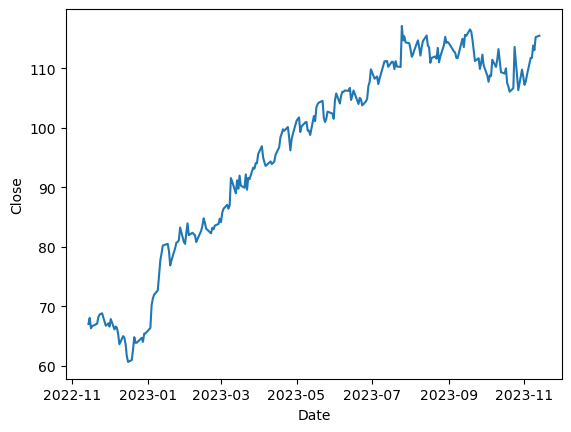

In [8]:
#The time-series data looks like this 
sns.lineplot(x=df['Date'], y=df['Close'])

In [9]:
#Printing the start and the end date 
print("Start date is: ", df['Date'].min())
print("End date is: ", df['Date'].max())


Start date is:  2022-11-14 00:00:00
End date is:  2023-11-13 00:00:00


In [10]:
#Divide the dataset into Train and Testing data
train, test = df.loc[df['Date'] <= '2023-07-31'], df.loc[df['Date'] > '2023-07-31']

In [11]:
#Converting the pandas dataframe to numpy array
#dataset = dataframe.values
#dataset = dataset.astype('float32') #Convert values to float

#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalizing the dataset
#we can also use ---> scaler = MinMaxScaler() 
scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

In [12]:
train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])


/tmp/ipykernel_77/2411660821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close'] = scaler.transform(train[['Close']])
/tmp/ipykernel_77/2411660821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Close'] = scaler.transform(test[['Close']])


In [13]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).

seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

In [14]:
def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)


In [15]:
trainX, trainY = to_sequences(train[['Close']], train['Close'], seq_size)
testX, testY = to_sequences(test[['Close']], test['Close'], seq_size)


In [16]:
# Here i used 2 Models , so I am coomenting out one of the models ....
# We can define Autoencoder model
#Input shape would be seq_size, 1 - 1 beacuse we have 1 feature. 
# seq_size = trainX.shape[1]

# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(RepeatVector(trainX.shape[1]))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(trainX.shape[2])))

# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [17]:
#Trying another model
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 128)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             129       
 ributed)                                             

In [18]:
# fit model
history = model.fit(trainX, trainY, epochs=40, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/40
3/3 [==============================] - 5s 560ms/step - loss: 0.6496 - val_loss: 1.2784
Epoch 2/40
3/3 [==============================] - 0s 92ms/step - loss: 0.6324 - val_loss: 1.4034
Epoch 3/40
3/3 [==============================] - 0s 90ms/step - loss: 0.6323 - val_loss: 1.1869
Epoch 4/40
3/3 [==============================] - 0s 90ms/step - loss: 0.6215 - val_loss: 0.9205
Epoch 5/40
3/3 [==============================] - 0s 94ms/step - loss: 0.6273 - val_loss: 0.7711
Epoch 6/40
3/3 [==============================] - 0s 93ms/step - loss: 0.6219 - val_loss: 0.9214
Epoch 7/40
3/3 [==============================] - 0s 90ms/step - loss: 0.6161 - val_loss: 1.0370
Epoch 8/40
3/3 [==============================] - 0s 90ms/step - loss: 0.6155 - val_loss: 1.0746
Epoch 9/40
3/3 [==============================] - 0s 94ms/step - loss: 0.6149 - val_loss: 1.0672
Epoch 10/40
3/3 [==============================] - 0s 91ms/step - loss: 0.6146 - val_loss: 1.0130
Epoch 11/40
3/3 [===========

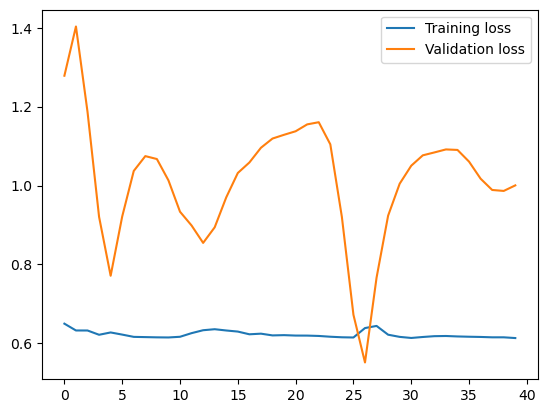

In [19]:
#Plotting the Training and Validation Loss vs. the number of Epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


5/5 [==============================] - 1s 32ms/step


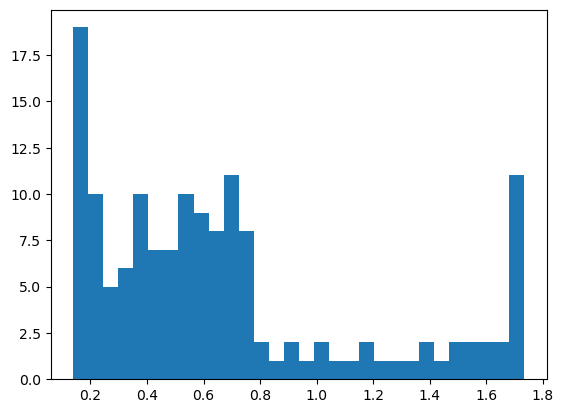

In [20]:
#model.evaluate(testX, testY)

#Anomaly is where reconstruction error is large.
#We can define this value beyond which we call anomaly.
#Let us look at MAE in training prediction

trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
max_trainMAE = 1.05  #or Define 90% value of max as threshold.


2/2 [==============================] - 0s 18ms/step


(array([2., 1., 2., 0., 1., 1., 1., 1., 0., 1., 0., 0., 2., 0., 1., 1., 0.,
        0., 0., 1., 1., 4., 2., 1., 0., 7., 2., 2., 2., 8.]),
 array([0.82335478, 0.83154497, 0.83973517, 0.84792537, 0.85611556,
        0.86430576, 0.87249596, 0.88068615, 0.88887635, 0.89706655,
        0.90525674, 0.91344694, 0.92163714, 0.92982733, 0.93801753,
        0.94620772, 0.95439792, 0.96258812, 0.97077831, 0.97896851,
        0.98715871, 0.9953489 , 1.0035391 , 1.0117293 , 1.01991949,
        1.02810969, 1.03629989, 1.04449008, 1.05268028, 1.06087048,
        1.06906067]),
 <BarContainer object of 30 artists>)

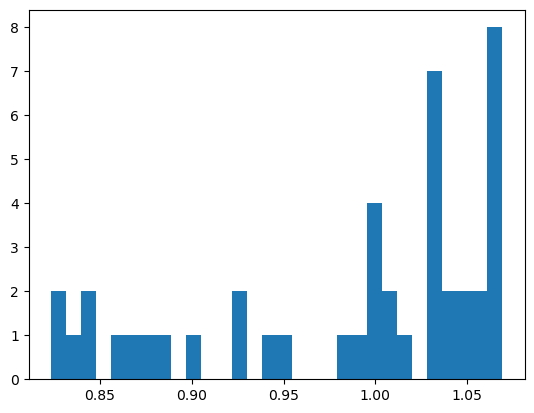

In [21]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)


In [22]:
#Capturing all details in a DataFrame for easy plotting
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['Close'] = test[seq_size:]['Close']

<AxesSubplot: xlabel='Date', ylabel='testMAE'>

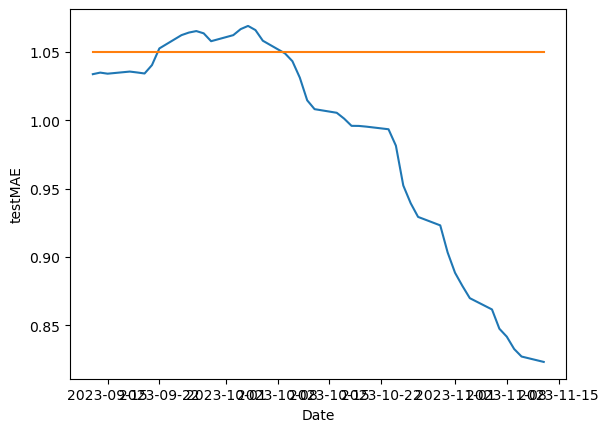

In [23]:
#Plotting testMAE vs max_trainMAE
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])

In [24]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

<AxesSubplot: xlabel='Date', ylabel='Close'>

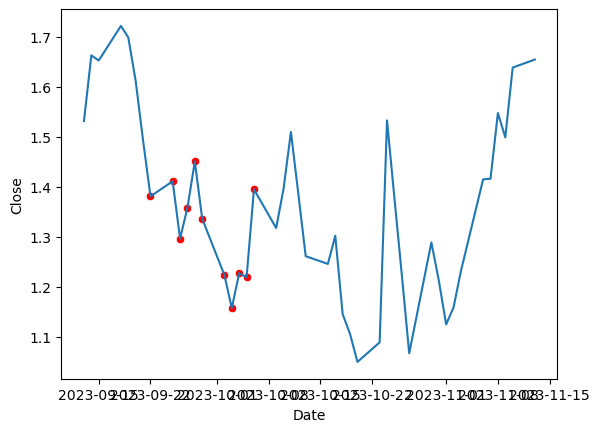

In [25]:
#Plot anomalies
sns.lineplot(x=anomaly_df['Date'], y=(anomaly_df['Close']))
sns.scatterplot(x=anomalies['Date'], y=(anomalies['Close']), color='r')

## Hybrid Model 
### ( Isolation Forest, Seasonal hybrid ESD, Autoencoders ands LSTM Autoencoders) for Real-time Data

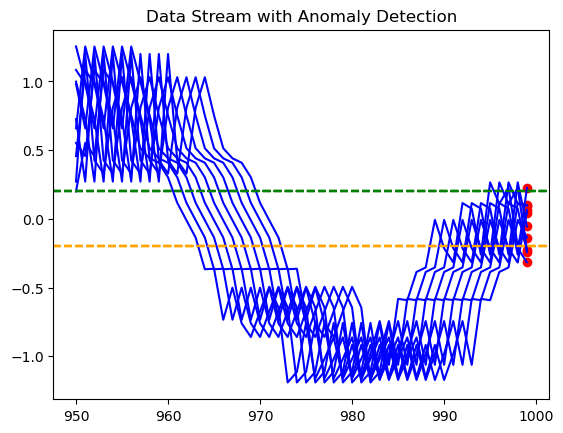

KeyboardInterrupt: 

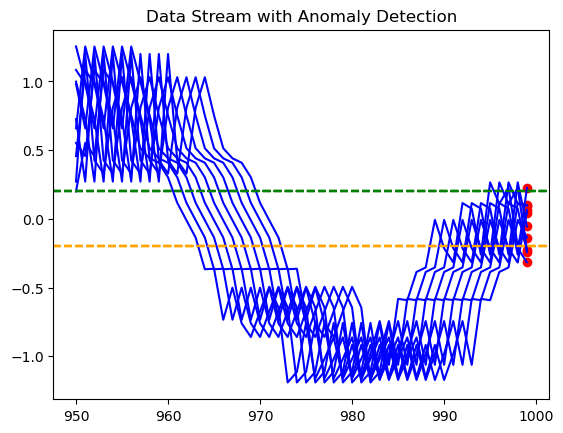

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from datetime import datetime
from IPython.display import display, clear_output
import time

# defining Global parameters
data_stream_length = 1000
window_size = 50  # Number of points to display in the window

# Initializing Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)

# Initializing Autoencoder
autoencoder = Sequential([
    Dense(8, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')

# Initializing LSTM Autoencoder
lstm_autoencoder = Sequential([
    LSTM(8, activation='relu', input_shape=(1, 1), return_sequences=True),
    LSTM(1, activation='linear', return_sequences=True)
])
lstm_autoencoder.compile(optimizer='adam', loss='mse')

# Initializing data stream
time_stamps = np.arange(data_stream_length)
data_stream = np.sin(0.1 * time_stamps) + 0.5 * np.sin(0.02 * time_stamps) + 0.2 * np.random.randn(data_stream_length)

# Function to update the plot
def update(frame):
    global data_stream, time_stamps

    # Simulating concept drift
    if frame % 200 == 0:
        data_stream += 0.5 * np.sin(0.05 * time_stamps)  # Introduce a new pattern every 200 time steps

    # Simulating random noise
    data_stream[-1] += 0.1 * np.random.randn()

    # Updating data stream
    data_stream = np.roll(data_stream, -1)
    data_stream[-1] = np.sin(0.1 * (time_stamps[-1] + 1)) + 0.5 * np.sin(0.02 * (time_stamps[-1] + 1)) + 0.2 * np.random.randn()

    # Updating Isolation Forest
    X_isolation_forest = data_stream[-window_size:].reshape(-1, 1)
    isolation_forest.fit(X_isolation_forest)

    # Updating Autoencoder
    X_autoencoder = StandardScaler().fit_transform(data_stream[-window_size:].reshape(-1, 1))
    autoencoder.fit(X_autoencoder, X_autoencoder, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Updating LSTM Autoencoder
    X_lstm_autoencoder = data_stream[-window_size:].reshape(-1, 1, 1)
    lstm_autoencoder.fit(X_lstm_autoencoder, X_lstm_autoencoder, epochs=50, batch_size=32, shuffle=True, verbose=0)

    # Predicting anomalies
    anomaly_scores_isolation_forest = isolation_forest.decision_function(X_isolation_forest)
    anomaly_scores_autoencoder = autoencoder.evaluate(X_autoencoder, X_autoencoder, verbose=0)
    anomaly_scores_lstm_autoencoder = lstm_autoencoder.evaluate(X_lstm_autoencoder, X_lstm_autoencoder, verbose=0)

    # Checking for anomalies
    if np.any(anomaly_scores_isolation_forest < -0.2) or anomaly_scores_autoencoder > 0.2 or anomaly_scores_lstm_autoencoder > 0.2:
        print(f"Anomaly detected at timestamp {datetime.now()}!")

    # Plotting
    plt.plot(time_stamps[-window_size:], data_stream[-window_size:], color='blue')
    plt.scatter(time_stamps[-1], data_stream[-1], color='red', marker='o',
                label='Anomaly' if np.any(anomaly_scores_isolation_forest < -0.2) or anomaly_scores_autoencoder > 0.2 or anomaly_scores_lstm_autoencoder > 0.2 else '')
    plt.axhline(y=-0.2, color='orange', linestyle='--')
    plt.axhline(y=0.2, color='green', linestyle='--')
    plt.title('Data Stream with Anomaly Detection')
    clear_output(wait=True)
    display(plt.gcf())
    time.sleep(0.1)

# Creating a figure and axis
plt.figure()

# Setting up the animation
for i in range(data_stream_length - window_size):
    update(i)
